In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Load the dataset
train_df = pd.read_json('data/train_sm.jsonl', lines=True)


In [3]:
# 2. Basic Statistics
print("\nBasic Statistics for Numerical Columns:")
print(train_df.describe())



Basic Statistics for Numerical Columns:
       absolute_message_index  relative_message_index          year  \
count            13132.000000            13132.000000  13132.000000   
mean              1026.960021              120.646512   1903.535029   
std                813.861939              139.004464      2.373907   
min                  0.000000                0.000000   1901.000000   
25%                364.000000               23.000000   1902.000000   
50%                802.000000               66.000000   1903.000000   
75%               1540.000000              159.000000   1905.000000   
max               3301.000000              674.000000   1910.000000   

         game_score  game_score_delta       game_id  
count  13132.000000      13132.000000  13132.000000  
mean       5.326226          0.071429      4.363006  
std        2.049506          2.150761      3.184507  
min        0.000000        -14.000000      1.000000  
25%        4.000000         -1.000000      2.0000

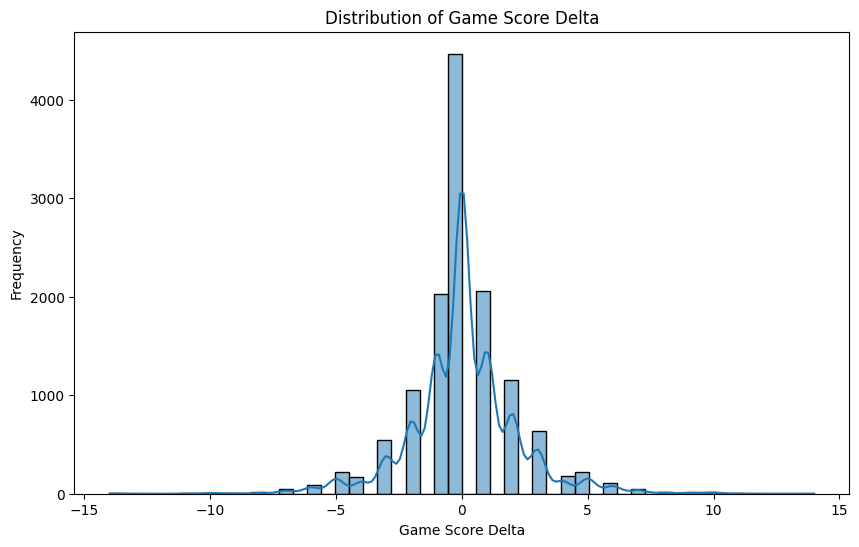

In [4]:
# 3. Distribution of Target Variable (game_score_delta)
plt.figure(figsize=(10, 6))
sns.histplot(train_df['game_score_delta'], bins=50, kde=True)
plt.title('Distribution of Game Score Delta')
plt.xlabel('Game Score Delta')
plt.ylabel('Frequency')
plt.show()

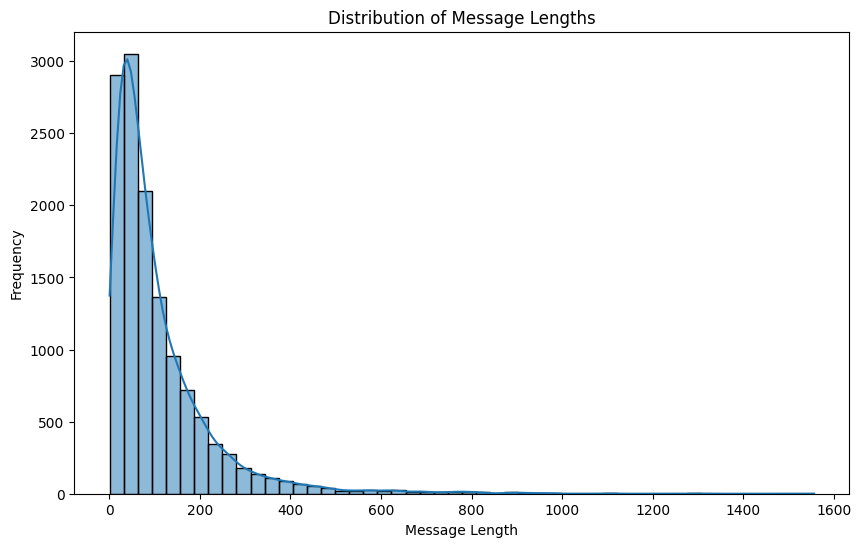

In [5]:
# 4. Message Length Analysis
train_df['message_length'] = train_df['message'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(train_df['message_length'], bins=50, kde=True)
plt.title('Distribution of Message Lengths')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.show()


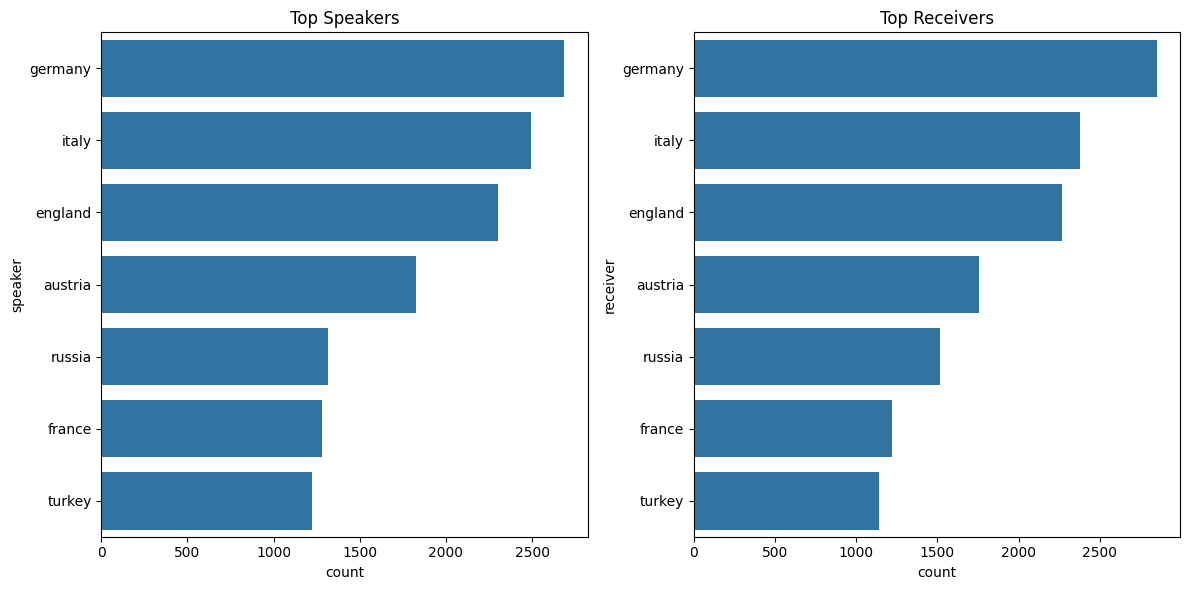

In [6]:
# 5. Sender and Receiver Analysis
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(y='speaker', data=train_df, order=train_df['speaker'].value_counts().index)
plt.title('Top Speakers')

plt.subplot(1, 2, 2)
sns.countplot(y='receiver', data=train_df, order=train_df['receiver'].value_counts().index)
plt.title('Top Receivers')
plt.tight_layout()
plt.show()

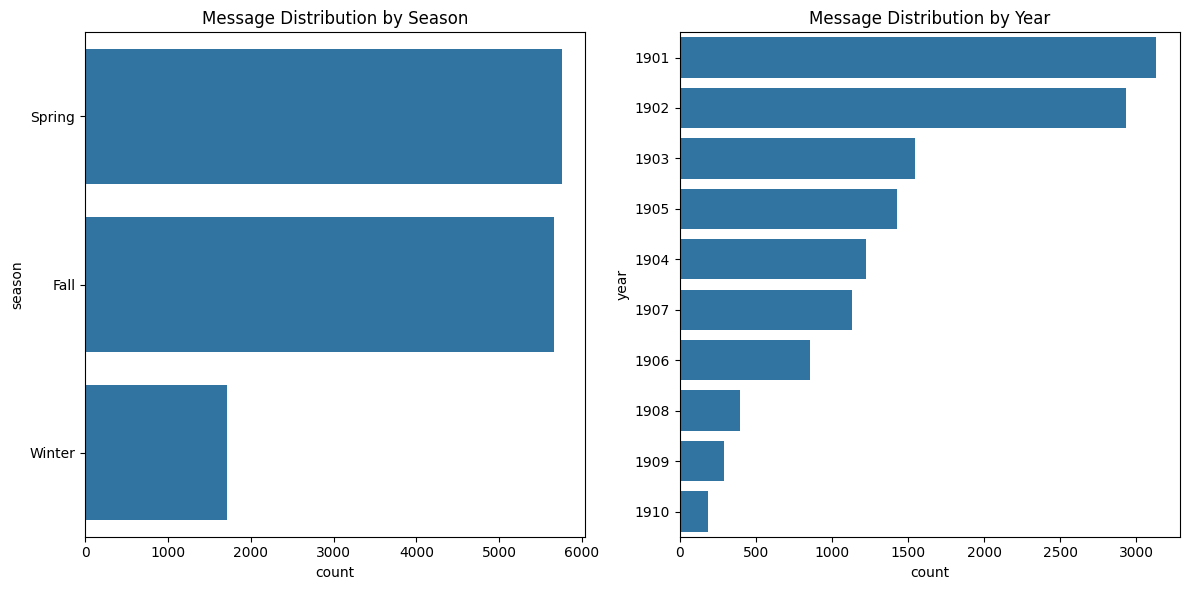

In [7]:
# 6. Season and Year Analysis
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(y='season', data=train_df, order=train_df['season'].value_counts().index)
plt.title('Message Distribution by Season')

plt.subplot(1, 2, 2)
sns.countplot(y='year', data=train_df, order=train_df['year'].value_counts().index)
plt.title('Message Distribution by Year')
plt.tight_layout()
plt.show()

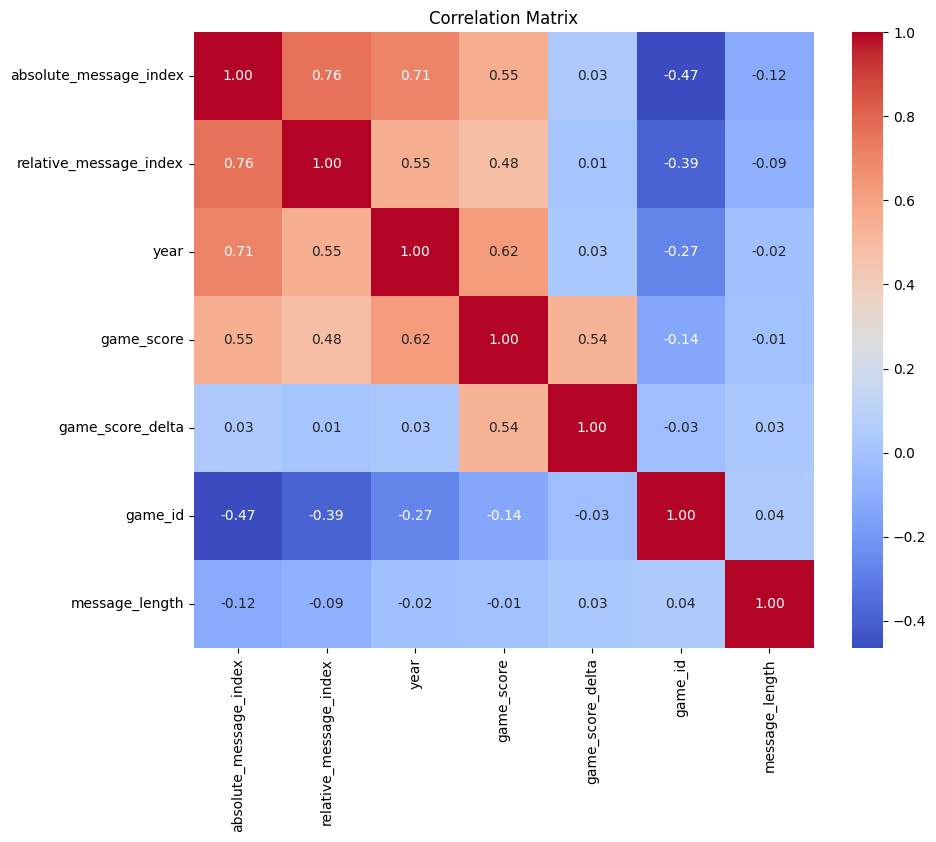

In [8]:
# 7. Correlation Analysis
numerical_cols = train_df.select_dtypes(include=[np.number]).columns
corr_matrix = train_df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

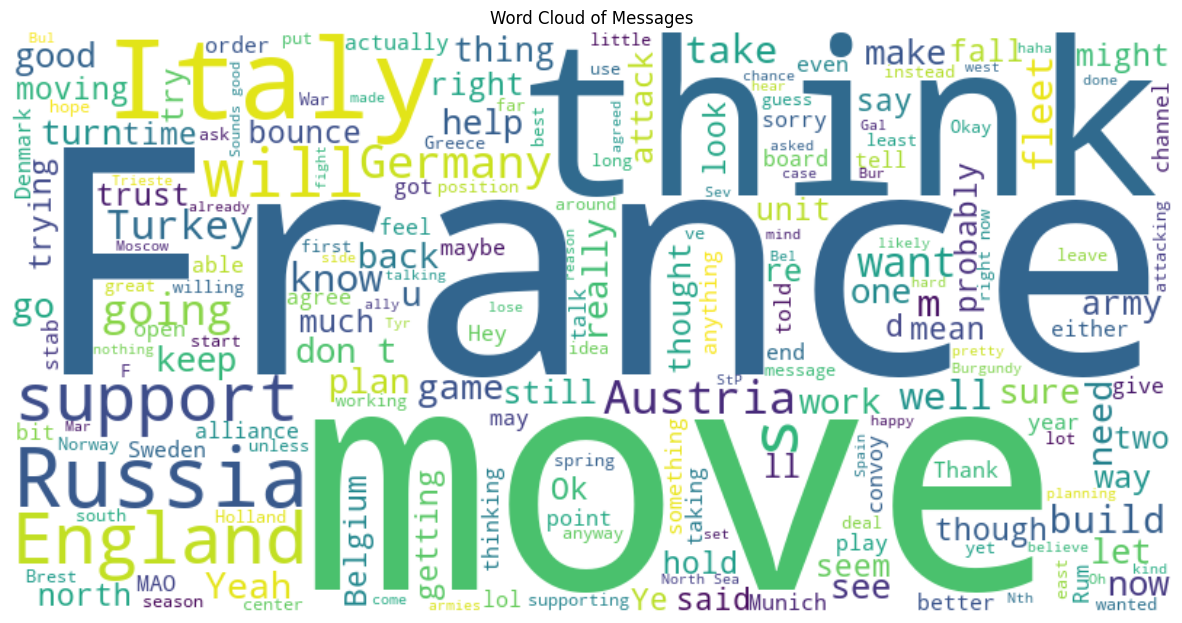

In [10]:
# 8. Message Content Analysis
from wordcloud import WordCloud

# Combine all messages into one text
all_text = ' '.join(train_df['message'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Messages')
plt.show()

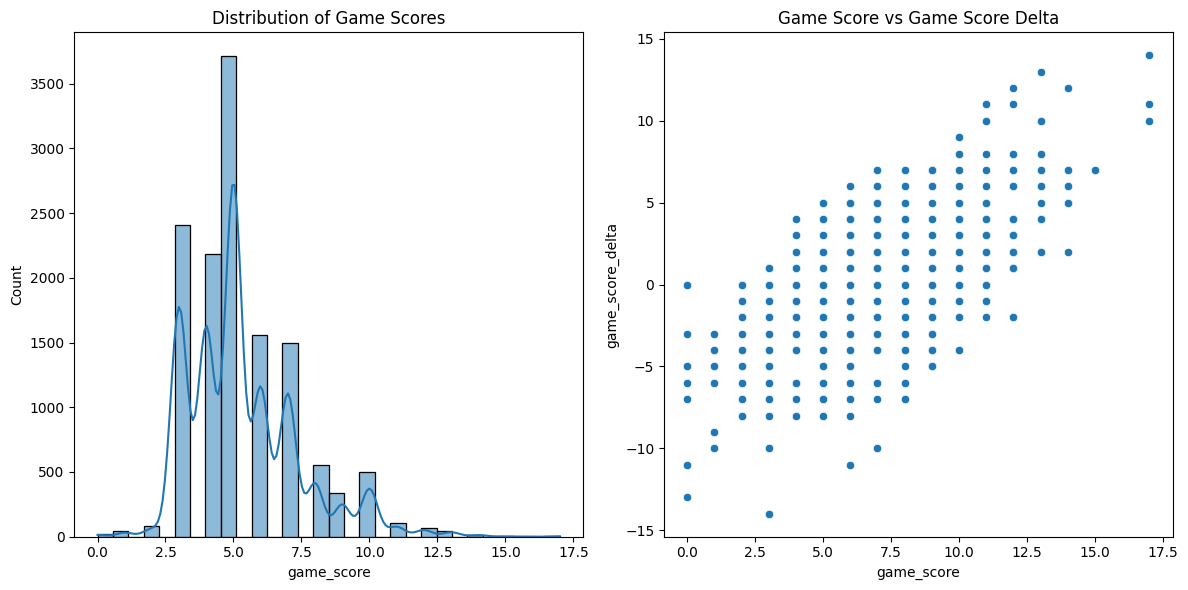

In [11]:
# 9. Game Score Analysis
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(train_df['game_score'], bins=30, kde=True)
plt.title('Distribution of Game Scores')

plt.subplot(1, 2, 2)
sns.scatterplot(x='game_score', y='game_score_delta', data=train_df)
plt.title('Game Score vs Game Score Delta')
plt.tight_layout()
plt.show()


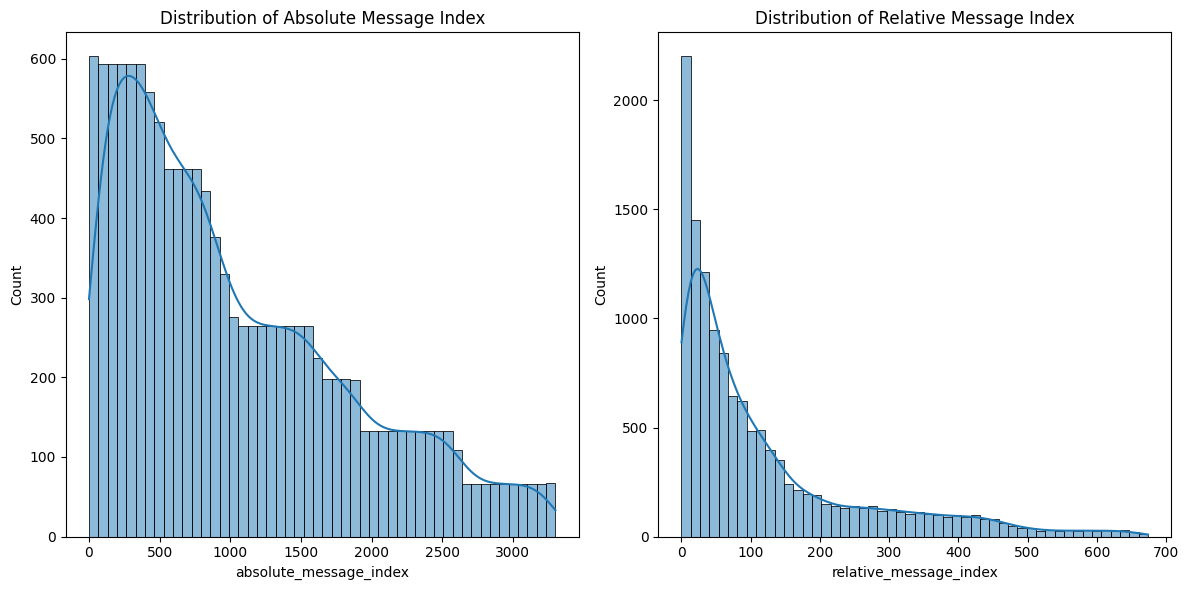

In [12]:
# 10. Message Index Analysis
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(train_df['absolute_message_index'], bins=50, kde=True)
plt.title('Distribution of Absolute Message Index')

plt.subplot(1, 2, 2)
sns.histplot(train_df['relative_message_index'], bins=50, kde=True)
plt.title('Distribution of Relative Message Index')
plt.tight_layout()
plt.show()